<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Identified-prenylated-proteins" data-toc-modified-id="Identified-prenylated-proteins-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Identified prenylated proteins</a></span></li><li><span><a href="#How-many-of-the-identified-proteins-have-been-previously-known-to-be-farnesylated-or-geranylgeranylated?" data-toc-modified-id="How-many-of-the-identified-proteins-have-been-previously-known-to-be-farnesylated-or-geranylgeranylated?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>How many of the identified proteins have been previously known to be farnesylated or geranylgeranylated?</a></span></li><li><span><a href="#Enrichment?-Hypergeometric-distribution-and-Fisher's-exact-test" data-toc-modified-id="Enrichment?-Hypergeometric-distribution-and-Fisher's-exact-test-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Enrichment? Hypergeometric distribution and Fisher's exact test</a></span></li><li><span><a href="#Proteins-known-to-be-prenylated-&amp;-found-in-other-experiments" data-toc-modified-id="Proteins-known-to-be-prenylated-&amp;-found-in-other-experiments-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Proteins known to be prenylated &amp; found in other experiments</a></span><ul class="toc-item"><li><span><a href="#Comparison-to-Exp2" data-toc-modified-id="Comparison-to-Exp2-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Comparison to Exp2</a></span></li><li><span><a href="#Comparison-to-Exp3" data-toc-modified-id="Comparison-to-Exp3-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Comparison to Exp3</a></span></li></ul></li><li><span><a href="#Proteins-NOT-known-to-be-prenylated-&amp;-found-in-other-experiments" data-toc-modified-id="Proteins-NOT-known-to-be-prenylated-&amp;-found-in-other-experiments-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Proteins NOT known to be prenylated &amp; found in other experiments</a></span><ul class="toc-item"><li><span><a href="#Comparison-to-Exp2" data-toc-modified-id="Comparison-to-Exp2-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Comparison to Exp2</a></span></li><li><span><a href="#Comparison-to-Exp3" data-toc-modified-id="Comparison-to-Exp3-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Comparison to Exp3</a></span></li></ul></li><li><span><a href="#Proteins-NOT-known-to-be-prenylated-&amp;-NOT-found-in-other-experiments" data-toc-modified-id="Proteins-NOT-known-to-be-prenylated-&amp;-NOT-found-in-other-experiments-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Proteins NOT known to be prenylated &amp; NOT found in other experiments</a></span></li><li><span><a href="#Robust-identified-prenylated-proteins" data-toc-modified-id="Robust-identified-prenylated-proteins-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Robust identified prenylated proteins</a></span></li></ul></div>

In [ ]:
import sys
import os
import session_info

# Add the '0_functions' folder to sys.path
sys.path.append(os.path.join(os.getcwd(), '..', '0_functions'))

In [1]:
import pandas as pd
import numpy as np
from functions import clean_agg
from functions import fishers_exact_test
from scipy.stats import hypergeom
from matplotlib_venn import venn2
from matplotlib import pyplot as plt

In [2]:
# Display session information
session_info.show()

In [3]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [4]:
datafolder = 'data'
figures = 'data/figures'
known_proteins_datafolder = '../Known_prenylated_proteins/data'

In [5]:
# Load data

# Uniprot known prenylated proteins
all_UP = pd.read_csv(os.path.join(known_proteins_datafolder, 'known_proteins', 'known_all.csv'), sep=';')
F_UP = pd.read_csv(os.path.join(known_proteins_datafolder, 'known_proteins', 'known_F.csv'), sep=';')
GG_UP = pd.read_csv(os.path.join(known_proteins_datafolder, 'known_proteins', 'known_GG.csv'), sep=';')

# All identified prenylated proteins
all_found = pd.read_csv(os.path.join(datafolder, 'identified_proteins', 'identified_all.csv'), sep=',')
known_found = pd.read_csv(os.path.join(datafolder, 'identified_proteins', 'identified_known.csv'), sep=',')
novel_found = pd.read_csv(os.path.join(datafolder, 'identified_proteins', 'identified_novel.csv'), sep=',')

# Identified prenylated proteins

In [6]:
print('All identified:', len(all_found))

All identified: 49


# How many of the identified proteins have been previously known to be farnesylated or geranylgeranylated? 

In [7]:
all_known_identified = all_UP[all_UP['ID'].isin(all_found['ID'])]

F_known_identified = F_UP[F_UP['ID'].isin(all_found['ID'])]
GG_known_identified = GG_UP[GG_UP['ID'].isin(all_found['ID'])]

print('All known identified:', len(all_known_identified), ', F known identified:', len(F_known_identified), 
      ', GG known identified:', len(GG_known_identified))

All known identified: 31 , F known identified: 28 , GG known identified: 3


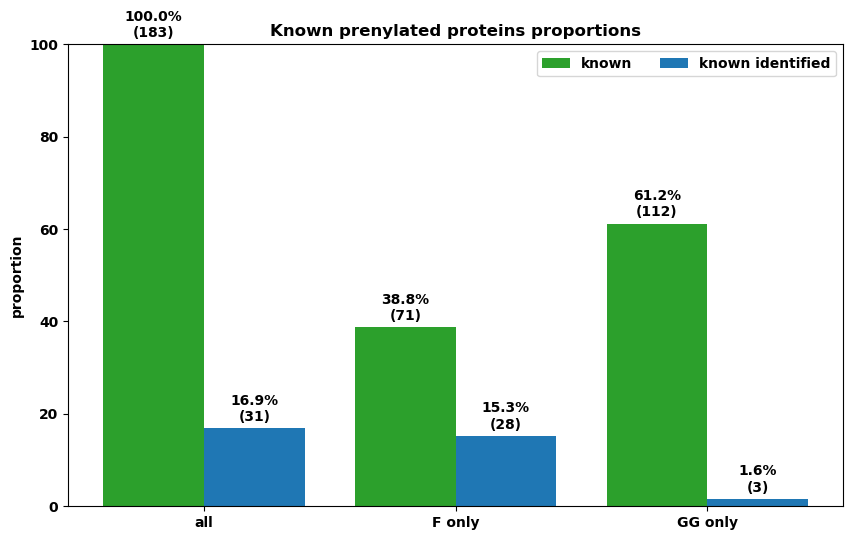

In [8]:
motifs = ("all", "F only", "GG only")
group_counts = {
    'known': [len(all_UP), len(F_UP), len(GG_UP)],
    'known identified': [len(all_known_identified), len(F_known_identified), len(GG_known_identified)],
}

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['tab:green', 'tab:blue'])

group_proportions = {key: [(x / len(all_UP)) * 100 for x in value] for key, value in group_counts.items()}

group_labels = {key: [f"{round(prop, 1)}%\n({count})" for prop, count in zip(group_proportions[key], group_counts[key])] for key in group_counts}

x = np.arange(len(motifs))
width = 0.4
multiplier = 1 - (len(group_counts) - 1) / 2

fig, ax = plt.subplots(figsize=(10, 6))

for i, (attribute, measurement) in enumerate(group_proportions.items()):
    offset = width * (multiplier + i)
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, group_labels[attribute], padding=3)

ax.set_ylabel('proportion')
ax.set_title('Known prenylated proteins proportions')
ax.set_xticks(x + width, motifs)
ax.legend(loc='upper right', ncols=3)
ax.set_ylim(0, 100)
plt.rcParams.update({'font.size': 13})

# save
plt.savefig(os.path.join(figures, 'bars_known_proteins.png'))

plt.show()


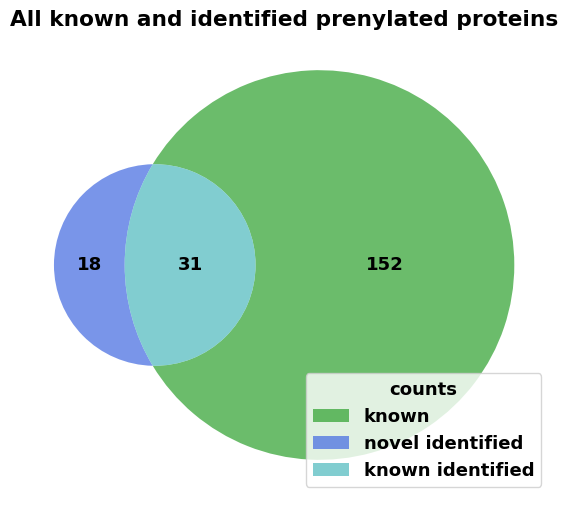

In [9]:
# Overlap all known proteins and all identified proteins
# all

set_known = set(all_UP['ID'])
set_identified = set(all_found['ID'])

# Calculate the subsets for the Venn diagram
subset_known_only = len(set_known - set_identified)
subset_identified_only = len(set_identified - set_known)
subset_both = len(set_known & set_identified)

sets = {
    '01': subset_known_only,
    '10': subset_identified_only,
    '11': subset_both
}

plt.figure(figsize=(10, 6))
ax = plt.gca()
v = venn2(subsets=sets, set_labels=('', ''), ax=ax, set_colors=('royalblue', 'tab:green'), alpha=0.7)

h = []
for i in sets:
    h.append(v.get_patch_by_id(i))

l = ['known', 'novel identified', 'known identified']

ax.legend(handles=h, labels=l, title="counts", loc='lower right')

plt.title('All known and identified prenylated proteins')

# save
plt.savefig(os.path.join(figures, 'venn_known_identified.png'))

plt.show()

In [10]:
# Identified proteins are known to be prenylated but not with the same moiety as the known ones!

known_found.query('moiety != Exp_moiety').reset_index(drop=True)

,ID,name,fullName,substrate,location,moiety,AminoAcid,position,evidenceCode,publication,ProteinEntryReviewed,motif,pep,Exp_moiety
0,Q15669,RHOH,Rho-related GTP-binding protein RhoH,Rho,Membrane,S-geranylgeranyl cysteine,C,-4,ECO_0000250,NaN,True,CXXX,LFSINECKIF,S-farnesyl cysteine
1,Q8WV99,ZFN2B,AN1-type zinc finger protein 2B,ZFN2B,Membrane,S-geranylgeranyl cysteine,C,-4,ECO_0000250,NaN,True,CXXX,SSKPSNCSLC,S-farnesyl cysteine
2,Q9Y3L5,RAP2C,Ras-related protein Rap-2c,Ras,Membrane,S-geranylgeranyl cysteine,C,-4,ECO_0000250,NaN,True,CAAX,DQCCTTCVVQ,S-farnesyl cysteine


# Enrichment? Hypergeometric distribution and Fisher's exact test

Premise: randomly choose 49 proteins from the human proteome.
Expected N of known prenylated proteins:  0
Actual N of identified known prenylated proteins:  31


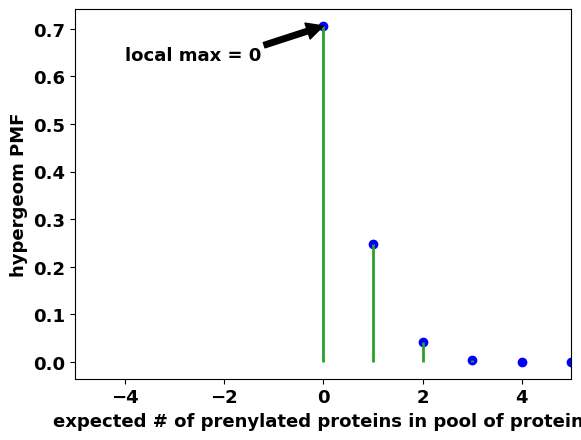

The difference between actual and expected amount of proteins has a p-value=1.57e-55(****). 
We have significantly more enriched proteins than randomly expected.


In [11]:
# -> We have a collection of 20'000 proteins in the human proteome, of which 183 are known to be prenylated.
# We want to know the probability of finding a given number of prenylated proteins if we randomly choose N of 
# the 20'000 human proteins.

print('Premise: randomly choose', len(all_found), 'proteins from the human proteome.')

[M, n, N] = [25866, len(all_UP), len(all_found)]

rv = hypergeom(M, n, N)
x = np.arange(0, n+1)

pmf_all_p = rv.pmf(x)

print('Expected N of known prenylated proteins: ', np.argmax(pmf_all_p))
print('Actual N of identified known prenylated proteins: ', len(all_known_identified))

fig, ax = plt.subplots()
ax.plot(x, pmf_all_p, 'bo')
ax.vlines(x, 0, pmf_all_p, lw=2)
plt.xlim(-5, 5)
ax.set_xlabel('expected # of prenylated proteins in pool of proteins')
ax.set_ylabel('hypergeom PMF')

ax.annotate('local max = 0', xy=(np.argmax(pmf_all_p), pmf_all_p[np.argmax(pmf_all_p)]), xycoords='data',
            xytext=(0.1, 0.9), textcoords='axes fraction',
            va='top', ha='left',
            arrowprops=dict(facecolor='black'))

plt.show()

p_value = fishers_exact_test(len(all_known_identified), N, n, M)

print('The difference between actual and expected amount of proteins has a p-value=', 
      "{:.2e}".format(p_value), '(****). \nWe have significantly more enriched proteins than randomly expected.', sep='')

# On the basis of what information?

In [12]:
# List of identified proteins that are in the uniprot list, already known to be prenylated

# isolate the evidence code of these identified known proteins
evidence = known_found[['ID', 'evidenceCode', 'publication']]
evidence = evidence.drop_duplicates()

# aggregate on ID to get one entry per protein
agg_evidence = evidence.groupby('ID').agg(set).reset_index()
agg_evidence = clean_agg(agg_evidence)

In [13]:
# Count how many proteins have which evidence code

agg_evidence['evidenceCode'].value_counts()

# ECO_0000269    Experimental evidence (experimental + manual assertion)
# ECO_0000250    Sequence similarity evidence (manual assertion)
# ECO_0007744    Combinatorial evidence (manual assertion)
# ECO_0000305    Curator inference evidence (manual assertion)

evidenceCode
ECO_0000269                                      17
ECO_0000250                                       6
extended_search                                   6
['ECO_0000305', 'ECO_0000269', 'ECO_0007744']     1
['ECO_0000269', 'ECO_0007744']                    1
Name: count, dtype: int64

In [14]:
# evidence codes of identified known proteins that have a publication

df = agg_evidence[agg_evidence['publication'].notna()]

print(df['evidenceCode'].value_counts())

evidenceCode
ECO_0000269                                      17
extended_search                                   6
['ECO_0000305', 'ECO_0000269', 'ECO_0007744']     1
['ECO_0000269', 'ECO_0007744']                    1
Name: count, dtype: int64
